In [23]:
import numpy as np
import pandas as pd

#ml stuff 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
flights = pd.read_csv('itineraries.csv')
flights.head()

,legId,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance
0,9ca0e81111c683bec1012473feefd28f,4/17/2022,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,True,...,1650214620,2022-04-17T12:57:00.000-04:00,1650223560,BOS,ATL,Delta,DL,Airbus A321,8940,947
1,98685953630e772a098941b71906592b,4/17/2022,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,...,1650191400,2022-04-17T06:30:00.000-04:00,1650200400,BOS,ATL,Delta,DL,Airbus A321,9000,947
2,98d90cbc32bfbb05c2fc32897c7c1087,4/17/2022,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,...,1650209700,2022-04-17T11:35:00.000-04:00,1650218700,BOS,ATL,Delta,DL,Boeing 757-200,9000,947
3,969a269d38eae583f455486fa90877b4,4/17/2022,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,True,...,1650218340,2022-04-17T13:59:00.000-04:00,1650227460,BOS,ATL,Delta,DL,Airbus A321,9120,947
4,980370cf27c89b40d2833a1d5afc9751,4/17/2022,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,True,...,1650203940,2022-04-17T09:59:00.000-04:00,1650213180,BOS,ATL,Delta,DL,Airbus A321,9240,947


In [18]:
# adding what day flight was on
flights['flightDate'] = pd.to_datetime(flights['flightDate'])
flights['day_of_week'] = flights['flightDate'].dt.day_name()

flights

,legId,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,day_of_week
0,9ca0e81111c683bec1012473feefd28f,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,True,...,2022-04-17T12:57:00.000-04:00,1650223560,BOS,ATL,Delta,DL,Airbus A321,8940,947,Sunday
1,98685953630e772a098941b71906592b,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,...,2022-04-17T06:30:00.000-04:00,1650200400,BOS,ATL,Delta,DL,Airbus A321,9000,947,Sunday
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,...,2022-04-17T11:35:00.000-04:00,1650218700,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,Sunday
3,969a269d38eae583f455486fa90877b4,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,True,...,2022-04-17T13:59:00.000-04:00,1650227460,BOS,ATL,Delta,DL,Airbus A321,9120,947,Sunday
4,980370cf27c89b40d2833a1d5afc9751,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,True,...,2022-04-17T09:59:00.000-04:00,1650213180,BOS,ATL,Delta,DL,Airbus A321,9240,947,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,fb30e589338583670450e50a755b7d0f,2022-05-05,SFO,DFW,OH4OZVMN,PT8H49M,0,False,False,False,...,2022-05-05T13:00:00.000-07:00||2022-05-05T17:5...,1651788540||1651812540,SEA||DFW,SFO||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 9||Boeing 737-800,7740||14040,679||1663,Thursday
249996,fb94338f3d30a46bc825993ba3c3bcc1,2022-05-05,SFO,DFW,OH4OZVMN,PT9H44M,0,False,False,False,...,2022-05-05T12:05:00.000-07:00||2022-05-05T17:5...,1651785240||1651812540,SEA||DFW,SFO||SEA,Alaska Airlines||Alaska Airlines,AS||AS,AIRBUS INDUSTRIE A321 SHARKLETS||Boeing 737-800,7740||14040,679||1663,Thursday
249997,93f1cfb0e12005374581aa5cfd7c284e,2022-05-05,SFO,DFW,QAA0OKEN,PT5H25M,0,False,False,False,...,2022-05-05T16:10:00.000-07:00||2022-05-05T20:4...,1651801200||1651811700,DEN||DFW,SFO||DEN,United||United,UA||UA,Airbus A319||Boeing 737 MAX 9,9000||6900,954||650,Thursday
249998,a0f75170e4e4589f6248434c8ea8e012,2022-05-05,SFO,DFW,K7AKZNN1,PT3H33M,0,False,False,True,...,2022-05-05T08:00:00.000-07:00,1651775580,DFW,SFO,American Airlines,AA,Airbus A321,12780,1468,Thursday


Mean Squared Error: 25.042407306672764
R-squared: 0.9995119242141198
Mean Absolute Error: 1.9769894350081076


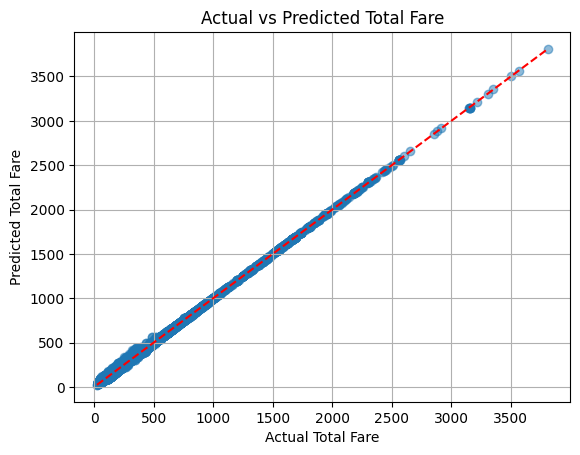

In [19]:
#with baseFare
# features are variables/columns we want to use to predict the target variable 
features = ['baseFare', 'totalTravelDistance', 'seatsRemaining', 'isNonStop',
            'startingAirport', 'destinationAirport', 'travelDuration', 'segmentsAirlineName', 'day_of_week']
target = 'totalFare' #totalFare

# for missing values, get the mean for numerical data 
numerical_features = ['baseFare', 'totalTravelDistance', 'seatsRemaining']
numerical_transformer = SimpleImputer(strategy='mean')

# for categorical data, it just assigns a number to each category (so delta = 1, united = 2, etc)
categorical_features = ['startingAirport', 'destinationAirport', 'segmentsAirlineName', 'day_of_week']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append a linear regression model to the preprocessor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Separate features and target variable
X = flights[features]
y = flights[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plot the diagonal line
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Actual vs Predicted Total Fare')
plt.grid(True)
plt.show()

Linear Regression Mean Squared Error: 25732.913007623054
Linear Regression R-squared: 0.42020171452935073
Linear Regression Mean Absolute Error: 95.71731860747254


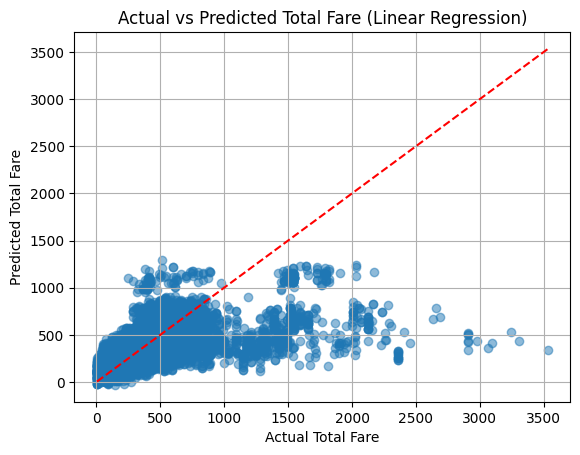

Gradient Boosting Regression Mean Squared Error: 23776.617799427295
Gradient Boosting Regression R-squared: 0.4642797638061791
Gradient Boosting Regression Mean Absolute Error: 95.06003172038113


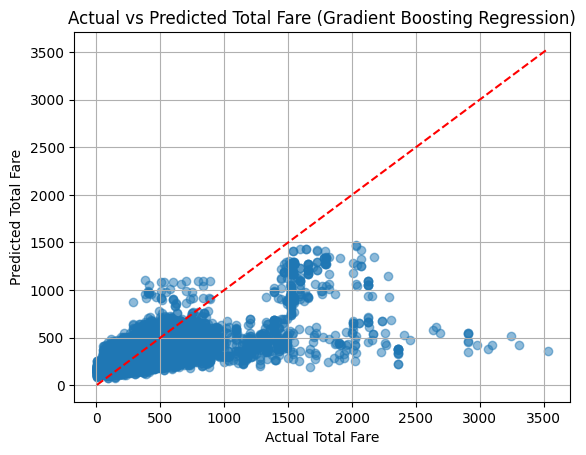

XGBoost Mean Squared Error: 14025.191651409928
XGBoost R-squared: 0.6839929443481272
XGBoost Mean Absolute Error: 72.86100612168426


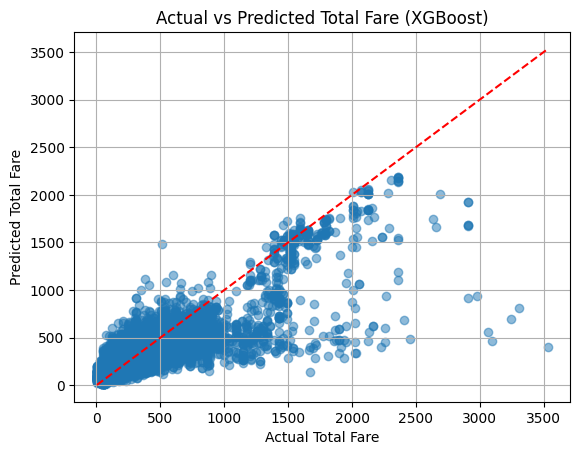

Decision Tree Regression Mean Squared Error: 12976.523228641252
Decision Tree Regression R-squared: 0.7076209010185737
Decision Tree Regression Mean Absolute Error: 54.56830393943562


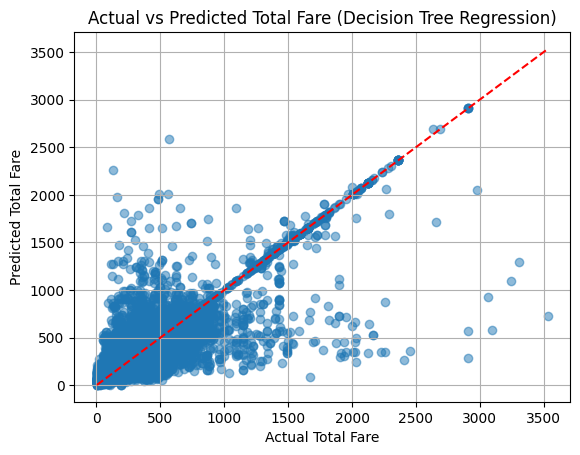

In [20]:
features = ['totalTravelDistance', 'seatsRemaining', 'isNonStop',
            'startingAirport', 'destinationAirport', 'travelDuration', 'segmentsAirlineName', 'day_of_week',
            'isBasicEconomy', 'isRefundable']
target = 'baseFare' #with totalFare, its like 42, 46, 68, 70

# for missing values, get the mean for numerical data
numerical_features = ['totalTravelDistance', 'seatsRemaining']
numerical_transformer = SimpleImputer(strategy='mean')

# for categorical data, it just assigns a number to each category
categorical_features = ['startingAirport', 'destinationAirport', 'segmentsAirlineName', 'day_of_week']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

# Combine numerical and categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = flights[features]
y = flights[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    # Append a model to the preprocessor
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])   

    full_pipeline.fit(X_train, y_train)
    y_pred = full_pipeline.predict(X_test)

    # metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} Mean Squared Error: {mse}')
    print(f'{name} R-squared: {r2}')
    print(f'{name} Mean Absolute Error: {mae}')
    
    # graph
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel('Actual Total Fare')
    plt.ylabel('Predicted Total Fare')
    plt.title(f'Actual vs Predicted Total Fare ({name})')
    plt.grid(True)
    plt.show()
